In [14]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

#**Partie 1 : Données de travail**

In [15]:
fromage=pd.read_table(r"fromage1.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

Comment sont réparties 
les données? Quels sont les attributs de ce jeu de données

In [16]:
print(fromage.shape)

(29, 9)


In [17]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


Visualiser la matrice de distribution de données

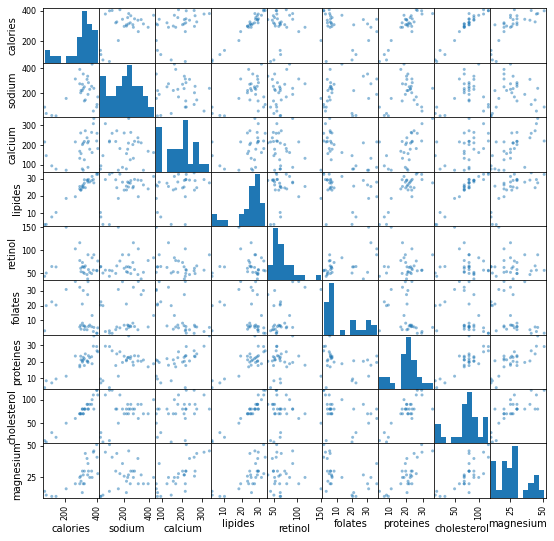

In [18]:
pd.plotting.scatter_matrix(fromage, figsize=(9,9));

**On peut discerner, à partir de cette matrice, la corrélation entre plusieurs attributs. En effet, on remarque une corrélation positive entre les calories et: cholesterol, proteines et lipides. On trouve aussi une corrélation positive entre les lipides et le cholesterol, entre les proteines et le magnesium, entre le cholesterol et le magnesium.**

#Partie 2: Méthodes des centres mobiles

K-MEANS ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés.On fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des instances à être plus proches de ses congénères du même groupe que des individus des autres groupes. Dans ce qui suit, on calcule la métrique « silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

In [19]:
np.random.seed(0); #Setting the seed means the next random call is the same
kmeans = cluster.KMeans(n_clusters = 4); #créer un modèle pour 4 clusters
kmeans.fit(fromage); #définir le modèle de clustering
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

**Les attributs des centres de chaque cluster.**

In [20]:
print(kmeans.cluster_centers_);

[[297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


#Aide à la détection du nombre adéquat de groupes

In [21]:
res = np.arange(9,dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters =k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage,km.labels_)
print(res)

[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


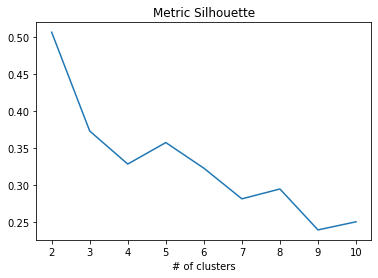

In [22]:
plt.title("Metric Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()
#Silhouette mesure l'algorithme de clustering

**La meilleure valeur de k (nbe de clusters) est celle qui maximise le coefficient de Silhouette. Dans notre cas, il s'agit de la valeur k=2.**

#Partie 3 : Classification ascendante hiérarchique

# **1. Le package SciPy**

Afficher le dendrogramme:

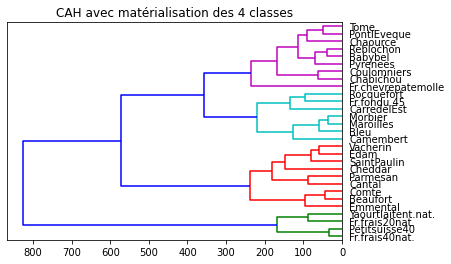

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]


In [23]:
Z = linkage(fromage,method='ward', metric='euclidean')
#cah et affichage du dendrogramme
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255) #255: bich yabda men niveau 255, ken tkaber les clusters bich yonksou w ken tsagher bich yektharou
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance') #choisir le niveau 255 => kharej 4 classes
print(groupes_cah)

In [24]:
#index triés des groupes
idg = np.argsort(groupes_cah) 
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))

             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


On distingue 4 clusters principaux, dont un qui regroupe les fromages frais correctement, mais les autres groupes regroupent des fromages de différents types (à pâte pressée cuite, à pâte pressée non cuite, à pâte molle et croûte lavée ...).

In [25]:
#la correspondance entre les groupes de la CAH et les clusters de Kmeans 
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3


# **2. Package Scikit-learn**

In [26]:
aggClustering = AgglomerativeClustering(4);
aggClustering.fit(fromage);

In [27]:
ida = np.argsort(aggClustering.labels_)
aggClusters = pd.DataFrame({
    'Cluster #':aggClustering.labels_[idk],
    'Fromage':fromage.index[idk]
})
print(aggClusters)

    Cluster #             Fromage
0           1         CarredelEst
1           2                Tome
2           2         PontlEveque
3           2           Chabichou
4           2            Chaource
5           2         Coulomniers
6           2  Fr.chevrepatemolle
7           0            Beaufort
8           0         SaintPaulin
9           0             Cheddar
10          0               Comte
11          0                Edam
12          0            Emmental
13          0            Vacherin
14          0            Parmesan
15          3       Petitsuisse40
16          3  Yaourtlaitent.nat.
17          3      Fr.frais20nat.
18          3      Fr.frais40nat.
19          1           Maroilles
20          1             Morbier
21          0              Cantal
22          1           Camembert
23          2            Pyrenees
24          2           Reblochon
25          1          Rocquefort
26          1                Bleu
27          2             Babybel
28          1 

In [28]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,8,0,1
3,1,0,0,6
4,6,0,0,3


Les clusters du CAH de scikit learn sont les memes que ceux de scipy

# **Partie 4: Interprétation des classes**
PCA est une approche qui vise à réduire les dimensions à 2D ou à 3D d'un jeu de données, tout en gardant le maximum possible d'informations après "fusion" de dimensions.

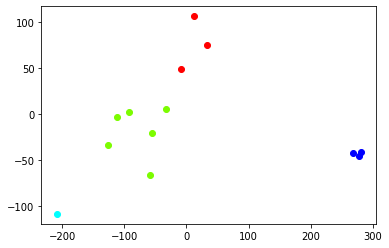

In [29]:
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe(cluster)
acp= PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

**Comme on l'a déduit précédemment, on trouve un cluster bien éloigné qui s'agit de celui des fromages frais (en bleu électrique). Ceci s'explique par une grande distinction entre les valeurs nutritionnelles de ces fromages et celles des autres types.**

# ***Divisive Clustering***

In [30]:
res = []
for n_clusters in range(2,len(fromage)) :
    km = cluster.KMeans(n_clusters = n_clusters)
    km.fit(fromage)
    res.append(metrics.silhouette_score(fromage,km.labels_)) 
print(res)

[0.5068135469058542, 0.37299770707104013, 0.3369907041718868, 0.35737615948947093, 0.30111134901675507, 0.2956534756213957, 0.2719976650516282, 0.2501888409145452, 0.269575687352818, 0.2541005951040621, 0.2643142100816868, 0.22124988776920776, 0.22774480427776397, 0.22267677026334962, 0.2200114526726967, 0.2004299255619123, 0.1635131304026138, 0.16895935790838157, 0.16968860881323772, 0.1773397636675813, 0.15669667897338196, 0.14271748290340933, 0.1246678502145519, 0.11163165863054139, 0.07949878130518177, 0.05330957947557388, 0.0400489698284847]


In [31]:
def divisive_clustering(dataframe, n_cluster):
    # One lonely cluster, named K to begin with
    clusters = []
    L = np.arange(0,len(dataframe.index))
    clusters.append(L)
    K = 1 

    ''' 
    In this loop, we divide a chosen cluster into two clusters at each iteration.
    The choice of cluster depends on the silhouette score. 
    
    Indeed, at each iteration, we calculate for each cluster the silhouette score obtained if we divide this cluster into two new ones
    clusters and we choose the cluster with the best score.

    '''
    while K != n_cluster :
        # silhouette score list
        scores = []
        for clus in clusters:
            # We set a threshold of 3 data points for each cluster
            if len(clus) < 3 :
                scores.append(-1)
                continue 
            # We increment the number of clusters likewise
            kmeans = cluster.KMeans(n_clusters = 2)
            kmeans.fit(dataframe.iloc[clus])
            # we compute the silhouette score
            scores.append(metrics.silhouette_score(dataframe.iloc[clus],kmeans.labels_))
        # The best scored cluster is chosen 
        best_score_index = scores.index(max(scores))
        best_cluster = clusters[best_score_index]
        # we split the cluster that we chose
        km = cluster.KMeans(n_clusters=2)
        km.fit(dataframe.iloc[best_cluster])
        cluster0 = []
        cluster1 = []
        for i,c in enumerate(km.labels_):
            if c == 0 :
                cluster0.append(best_cluster[i])
            else :
                cluster1.append(best_cluster[i])
        # We remove the devised cluster
        clusters.remove(best_cluster)
        clusters.append(cluster0)
        clusters.append(cluster1)
        # we can thus increment the number of clusters
        K += 1
        
    return(clusters)

In [32]:
# The function returns a list containing index lists. each index list corresponds to a cluster
div_clus = divisive_clustering(fromage,5)
# Printing our clusters 
for index,clus in enumerate(div_clus):
    print('\nCluster #{} :'.format(index+1))
    print(fromage.index[clus])


Cluster #1 :
Index(['Fr.chevrepatemolle'], dtype='object', name='Fromages')

Cluster #2 :
Index(['Fr.frais40nat.', 'Petitsuisse40'], dtype='object', name='Fromages')

Cluster #3 :
Index(['Fr.frais20nat.', 'Yaourtlaitent.nat.'], dtype='object', name='Fromages')

Cluster #4 :
Index(['Beaufort', 'Cantal', 'Cheddar', 'Comte', 'Edam', 'Emmental',
       'Parmesan', 'SaintPaulin', 'Vacherin'],
      dtype='object', name='Fromages')

Cluster #5 :
Index(['CarredelEst', 'Babybel', 'Bleu', 'Camembert', 'Chabichou', 'Chaource',
       'Coulomniers', 'Fr.fondu.45', 'Maroilles', 'Morbier', 'PontlEveque',
       'Pyrenees', 'Reblochon', 'Rocquefort', 'Tome'],
      dtype='object', name='Fromages')
